# Pandas Tutorial 2: Thanksgiving

In [1]:
import numpy as np
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/thanksgiving-2015/thanksgiving-2015-poll-data.csv'

In [3]:
data = pd.read_csv(url, encoding = "Latin-1")

In [4]:
data.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific


In [5]:
data.columns

Index(['RespondentID', 'Do you celebrate Thanksgiving?',
       'What is typically the main dish at your Thanksgiving dinner?',
       'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
       'How is the main dish typically cooked?',
       'How is the main dish typically cooked? - Other (please specify)',
       'What kind of stuffing/dressing do you typically have?',
       'What kind of stuffing/dressing do you typically have? - Other (please specify)',
       'What type of cranberry saucedo you typically have?',
       'What type of cranberry saucedo you typically have? - Other (please specify)',
       'Do you typically have gravy?',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
       'Which of these side dishes aretypically served

In [6]:
data['Do you celebrate Thanksgiving?'].unique()

array(['Yes', 'No'], dtype=object)

This dataset will allow us to answer questions about the data like:
<br> Do people in Suburban areas eat more Tofurkey than people in Rural areas?
<br> Where do people go to Black Friday sales most often?
<br> Is there a correlation between praying on Thanksgiving and income?
<br> What income groups are most likely to have homemade cranberry sauce?

### Applying a function to a series in pandas

first let's take a look at gender, use .value_counts() on the series to see that we have M, F, and NaN values

In [7]:
data['What is your gender?'].value_counts(dropna = False) # by default, dropna = True, which means it excludes the null values from your final list


Female    544
Male      481
NaN        33
Name: What is your gender?, dtype: int64

We want to apply a `0` for Female, and a `1` for Male

In [8]:
%%time

data['gender_num'] = data['What is your gender?'].apply(lambda x: 1 if x == 'Male' else (0 if x == 'Female' else np.NaN))
# Used a nested Ternary Operator!!

CPU times: user 1.21 ms, sys: 190 µs, total: 1.4 ms
Wall time: 1.23 ms


In [9]:
data['gender_num'].value_counts(dropna = False)

0.0    544
1.0    481
NaN     33
Name: gender_num, dtype: int64

Although...a np.where would theoretically have been faster. try it now.

In [10]:
%%time

data['gender_num'] = np.where(
    data['What is your gender?'] == 'Male',
    1,
    np.where(
    data['What is your gender?'] == 'Female',
        0,
        np.NaN
    )
)


CPU times: user 1.41 ms, sys: 485 µs, total: 1.89 ms
Wall time: 1.46 ms


In [11]:
data['gender_num'].value_counts(dropna = False)

0.0    544
1.0    481
NaN     33
Name: gender_num, dtype: int64

Apply with lambda and a ternary operator
CPU times: user 842 µs, sys: 107 µs, total: 949 µs
Wall time: 880 µs

nested np.where
CPU times: user 1.07 ms, sys: 49 µs, total: 1.12 ms
Wall time: 1.09 ms


The system time was about 2x the speed using the nested np.where

### Create a function to clean up the Income Column

In [12]:
data['How much total combined money did all members of your HOUSEHOLD earn last year?'].value_counts(dropna = False)

$25,000 to $49,999      180
Prefer not to answer    136
$50,000 to $74,999      135
$75,000 to $99,999      133
$100,000 to $124,999    111
$200,000 and up          80
$10,000 to $24,999       68
$0 to $9,999             66
$125,000 to $149,999     49
$150,000 to $174,999     40
NaN                      33
$175,000 to $199,999     27
Name: How much total combined money did all members of your HOUSEHOLD earn last year?, dtype: int64

Take a string called value as input.
Check to see if value is $200,000 and up, and return 200000 if so.
Check if value is Prefer not to answer, and return NaN if so.
Check if value is NaN, and return NaN if so.
Clean up value by removing any dollar signs or commas.
Split the string to extract the incomes, then average them.

In [37]:
import math

def cleanIncome(colvalue): #Take a string called value as input.
    if colvalue == '$200,000 and up':
        return 200000
    elif colvalue == 'Prefer not to answer':
        return np.NaN
    elif colvalue == 'NaN':
        return np.NaN
    else:
        if isinstance(colvalue, float):
            return colvalue
        else:
            colvalue = colvalue.replace(',', '').replace('$', '')
            low, high = colvalue.split(" to ")
            return (int(low) + int(high)) / 2
        

In [38]:
data['income'] = data['How much total combined money did all members of your HOUSEHOLD earn last year?'].apply(cleanIncome)

In [39]:
data['income']

0        87499.5
1        62499.5
2         4999.5
3       200000.0
4       112499.5
5         4999.5
6        37499.5
7            NaN
8        87499.5
9        37499.5
10       37499.5
11       37499.5
12        4999.5
13        4999.5
14       62499.5
15      200000.0
16      200000.0
17       87499.5
18       37499.5
19       87499.5
20       87499.5
21        4999.5
22        4999.5
23        4999.5
24       62499.5
25      200000.0
26       62499.5
27      112499.5
28           NaN
29       87499.5
          ...   
1028         NaN
1029     62499.5
1030     17499.5
1031     87499.5
1032         NaN
1033     87499.5
1034         NaN
1035     37499.5
1036     62499.5
1037     17499.5
1038    112499.5
1039     87499.5
1040     62499.5
1041     37499.5
1042    137499.5
1043     87499.5
1044     37499.5
1045     87499.5
1046     17499.5
1047     37499.5
1048     87499.5
1049         NaN
1050    137499.5
1051    137499.5
1052      4999.5
1053    112499.5
1054     62499.5
1055    112499

### Grouping Data with Pandas

In [40]:
data["What type of cranberry saucedo you typically have?"].value_counts()

Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
Name: What type of cranberry saucedo you typically have?, dtype: int64

In [41]:
homemade = data[
    data["What type of cranberry saucedo you typically have?"] == 'Homemade']

canned = data[
    data["What type of cranberry saucedo you typically have?"] == 'Canned']


In [42]:
print(homemade["income"].mean())
print(canned["income"].mean())

94878.1072874494
83823.40340909091


#### Instead, we can use .groupby

In [43]:
grouped = data.groupby("What type of cranberry saucedo you typically have?")
grouped

In [44]:
grouped.groups # .groups is an attribute of the DataFrameGroupBy objects

{'Canned': Int64Index([   4,    6,    8,   11,   12,   15,   18,   19,   26,   27,
             ...
             1040, 1041, 1042, 1044, 1045, 1046, 1047, 1051, 1054, 1057],
            dtype='int64', length=502),
 'Homemade': Int64Index([   2,    3,    5,    7,   13,   14,   16,   20,   21,   23,
             ...
             1016, 1017, 1025, 1027, 1030, 1034, 1048, 1049, 1053, 1056],
            dtype='int64', length=301),
 'None': Int64Index([   0,   17,   24,   29,   34,   36,   40,   47,   49,   51,
             ...
              980,  981,  997, 1015, 1018, 1031, 1037, 1043, 1050, 1055],
            dtype='int64', length=146),
 'Other (please specify)': Int64Index([   1,    9,  154,  216,  221,  233,  249,  265,  301,  336,  380,
              435,  444,  447,  513,  550,  749,  750,  784,  807,  860,  872,
              905, 1000, 1007],
            dtype='int64')}

In [45]:
grouped.size # whoops

<bound method GroupBy.size of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x11a3fcc18>>

In [46]:
grouped.size() # just like calling .value_counts() on a Series

What type of cranberry saucedo you typically have?
Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
dtype: int64

In [47]:
grouped['income'].agg(np.mean) # just look at the Income Series, and apply the numpy version of mean to it

What type of cranberry saucedo you typically have?
Canned                    83823.403409
Homemade                  94878.107287
None                      78886.084034
Other (please specify)    86629.978261
Name: income, dtype: float64

In [48]:
sauce = grouped['income'].agg(np.mean) # set the above to a variable, for easier reading I guess?

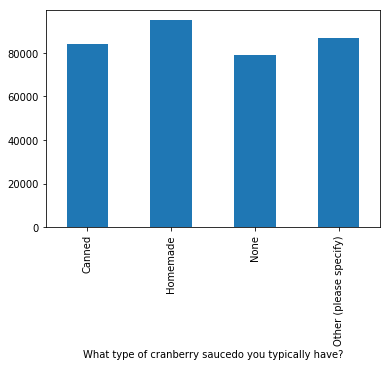

In [50]:
sauce.plot(kind = 'bar')

#### .groupby multiple columns by passing it a list of column names (wonder if indices would work?)

In [52]:
grouped2 = data.groupby(['What type of cranberry saucedo you typically have?', 'What is typically the main dish at your Thanksgiving dinner?'])

In [59]:
grouped2['income'].agg([np.mean])

mean
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...               
Canned                                             Chicken                                              80999.600000
                                                   Ham/Pork                                             77499.535714
                                                   I don't know                                          4999.500000
                                                   Other (please specify)                               53213.785714
                                                   Roast beef                                           25499.500000
                                                   Tofurkey                                            100713.857143
                                                   Turkey                                               85242.682045
Homemade                                           Chicken                                              19999.500000
                                                   Ham/Pork                                             96874.625000
                                                   I don't know                                                  NaN
                                                   Other (please specify)                               55356.642857
                                                   Roast beef                                           33749.500000
                                                   Tofurkey                                             57916.166667
                                                   Turducken                                           200000.000000
                                                   Turkey                                               97690.147982
None                                               Chicken                                              11249.500000
                                                   Ham/Pork                                             61249.500000
                                                   I don't know                                         33749.500000
                                                   Other (please specify)                              119106.678571
                                                   Roast beef                                          162499.500000
                                                   Tofurkey                                            112499.500000
                                                   Turducken                                                     NaN
                                                   Turkey                                               74606.275281
Other (please specify)                             Ham/Pork                                             87499.500000
                                                   Other (please specify)                              124999.666667
                                                   Tofurkey                                             37499.500000
                                                   Turkey                                               82916.194444

In [62]:
grouped2["income"].agg([np.mean, np.sum, np.std])

mean  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...                  
Canned                                             Chicken                                              80999.600000   
                                                   Ham/Pork                                             77499.535714   
                                                   I don't know                                          4999.500000   
                                                   Other (please specify)                               53213.785714   
                                                   Roast beef                                           25499.500000   
                                                   Tofurkey                                            100713.857143   
                                                   Turkey                                               85242.682045   
Homemade                                           Chicken                                              19999.500000   
                                                   Ham/Pork                                             96874.625000   
                                                   I don't know                                                  NaN   
                                                   Other (please specify)                               55356.642857   
                                                   Roast beef                                           33749.500000   
                                                   Tofurkey                                             57916.166667   
                                                   Turducken                                           200000.000000   
                                                   Turkey                                               97690.147982   
None                                               Chicken                                              11249.500000   
                                                   Ham/Pork                                             61249.500000   
                                                   I don't know                                         33749.500000   
                                                   Other (please specify)                              119106.678571   
                                                   Roast beef                                          162499.500000   
                                                   Tofurkey                                            112499.500000   
                                                   Turducken                                                     NaN   
                                                   Turkey                                               74606.275281   
Other (please specify)                             Ham/Pork                                             87499.500000   
                                                   Other (please specify)                              124999.666667   
                                                   Tofurkey                                             37499.500000   
                                                   Turkey                                               82916.194444   

                                                                                                              sum  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...               
Canned                                             Chicken                                               404998.0   
                                                   Ham/Pork                                             1084993.5   
                                                   I don't know                                            4999.5   
                                              

So the functions above in .agg all have to return an individual number, but what if we wanted the counts in the category? We'll have to group the data, and then run .apply with a lambda over it

In [65]:
grouped3 = data.groupby("How would you describe where you live?")["What is typically the main dish at your Thanksgiving dinner?"]
grouped3.apply(lambda x:x.value_counts())
# grouped3.apply(value_counts) this won't work b/c .value_counts() is a method, not a standalone function, need to a lambda

How would you describe where you live?                        
Rural                                   Turkey                    189
                                        Other (please specify)      9
                                        Ham/Pork                    7
                                        I don't know                3
                                        Tofurkey                    3
                                        Turducken                   2
                                        Chicken                     2
                                        Roast beef                  1
Suburban                                Turkey                    449
                                        Ham/Pork                   17
                                        Other (please specify)     13
                                        Tofurkey                    9
                                        Roast beef                  3
                           

##### Getting the responses in .value_counts() as a percentage of the whole
pass in "normalize = True" as an optional argument on .value_counts()

In [66]:
grouped3.apply(lambda x: x.value_counts(normalize = True))

How would you describe where you live?                        
Rural                                   Turkey                    0.875000
                                        Other (please specify)    0.041667
                                        Ham/Pork                  0.032407
                                        I don't know              0.013889
                                        Tofurkey                  0.013889
                                        Turducken                 0.009259
                                        Chicken                   0.009259
                                        Roast beef                0.004630
Suburban                                Turkey                    0.905242
                                        Ham/Pork                  0.034274
                                        Other (please specify)    0.026210
                                        Tofurkey                  0.018145
                                     

In [67]:
grouped3.apply(lambda x: x.value_counts(normalize = True)).sum()

3.0

So What the above "3.0" means is that the .value_counts(normalize = True) is doing is keeping the groupby
section separate, and presenting the options as a percentage WITHIN its group by rows

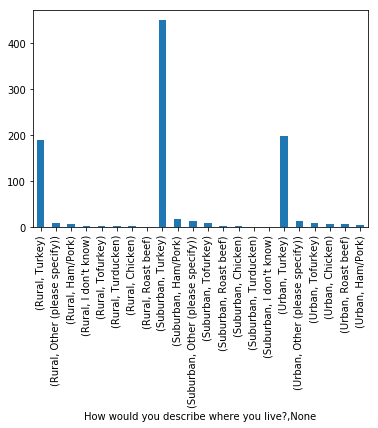

In [68]:
grouped3.apply(lambda x: x.value_counts()).plot(kind = 'bar')

### &~ conditionals

Essentially, this is the equivalent of & (x=False).


In [71]:
df = pd.DataFrame({
    'alphas' : ['a', 'b', 'c'],
    'nums' : [1,2,3],
    'var' : ['x', 'y', 'z']
})

In [77]:
new_df = df[
    (df['alphas'] == 'b') & (df['nums'] <= 2) &~ (df['var'] == 'z')
]

In [79]:
new_df # so because of the third conditional we know that both var==x and var==y would have been acceptable,
# because they are NOT 'z'

,alphas,nums,var
1,b,2,y


better_example

In [80]:
df = pd.DataFrame({
    'alphas' : ['a', 'b', 'c', 'd', 'e'],
    'nums' : [1,2,3,4,5],
    'var' : ['u', 'v', 'x', 'y', 'z']
})

In [81]:
df

,alphas,nums,var
0,a,1,u
1,b,2,v
2,c,3,x
3,d,4,y
4,e,5,z


In [82]:
new_df = df[
    (df['nums'] >= 2) &~ (df['var'] == 'z')
]

In [83]:
new_df

,alphas,nums,var
1,b,2,v
2,c,3,x
3,d,4,y


#### I guess I'm having trouble thinking of a scenario where I wouldn't just write that as below

In [84]:
new_df = df[
    (df['nums'] >= 2) & (df['var'] != 'z')
]

In [85]:
new_df

,alphas,nums,var
1,b,2,v
2,c,3,x
3,d,4,y


### split with an optional argument to feature engineer new columns

In [90]:
df = pd.DataFrame({
    'listitems' : ['green eggs', 'ham', 'Sam I am']
}
)


In [91]:
df

,listitems
0,green eggs
1,ham
2,Sam I am


In [92]:
# lang_lists = df["LanguageWorkedWith"].str.split(';', expand=True)
new_df = df['listitems'].str.split(' ', expand = True)

In [93]:
new_df

,0,1,2
0,green,eggs,None
1,ham,None,None
2,Sam,I,am


### df.stack() is like .melt

#### and then call .value_counts() on it

In [94]:
new_df.stack().value_counts()

Sam      1
am       1
eggs     1
ham      1
green    1
I        1
dtype: int64

In [95]:
new_df.stack().value_counts(normalize = True)

Sam      0.166667
am       0.166667
eggs     0.166667
ham      0.166667
green    0.166667
I        0.166667
dtype: float64

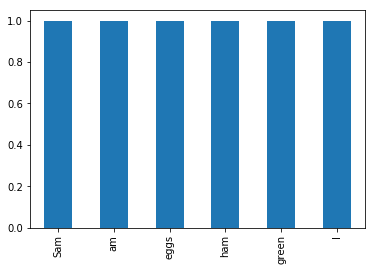

In [97]:
new_df.stack().value_counts().plot(kind = 'bar')

### The below URL shows our steps for api responses

https://dq-blog-files.s3.amazonaws.com/apis/convert-to-dataframe.svg

dataframes = [pd.DataFrame(r.json()['artists']['artist']) for r in responses] # listcomp to create a df from a list of lists
<br>bigger_df = pd.concat(dataframes) # add all those dataframes on top of each other

### TQDM module to add a progress bar

In [99]:
from tqdm import tqdm
from time import sleep

In [100]:
for i in tqdm(range(int(1e4))): # works in jupyter!
    sleep(0.01)
    pass

 17%|█▋        | 1676/10000 [00:18<01:33, 89.04it/s]

KeyboardInterrupt: 